<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-desafio_squad/blob/main/Desafio3SquadMaryJackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import norm

## **Desafio 1: Entendendo o consumidor.**

A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/desafio01consumidor.csv"
df_consumidor = pd.read_csv(url)
df_consumidor

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [ ]:
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


1. Entenda a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia.


a. Identifique as distribuições

In [ ]:
#cópia do dataframe para não alterar o original
df_clientes = df_consumidor.copy()

In [ ]:
df_clientes['pandemia'] = df_consumidor['pre-pandemia'].map({1: 'Pré', 0: 'Pós'})
df_clientes

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia,pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1,Pré
1,XXXXXXX15,59,837,desodorante,Nordeste,1,Pré
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1,Pré
3,XXXXXXX99,27,5409,batom,Sul,1,Pré
4,XXXXXXX98,24,1142,batom,Sudeste,1,Pré
...,...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0,Pós
199,XXXXXXX50,43,10930,antissinais,Norte,0,Pós
200,XXXXXXX65,48,10246,perfume,Nordeste,0,Pós
201,XXXXXXX61,47,12337,batom,Sudeste,0,Pós


In [ ]:
#distribuição de idade
distribuicao_idade = df_clientes.groupby(['pandemia'])['idade'].describe()
print("Distribuição por Idade:")
print(distribuicao_idade)

Distribuição por Idade:
          count       mean        std   min    25%   50%    75%   max
pandemia                                                             
Pré       101.0  39.881188  15.016183  16.0  28.00  37.0  48.00  80.0
Pós       102.0  44.901961  13.373174  15.0  35.25  46.0  54.75  77.0


In [ ]:
#distribuição de renda
distribuicao_renda = df_clientes.groupby(['pandemia'])['renda'].describe()
print("Distribuição por Renda:")
print(distribuicao_renda)

Distribuição por Renda:
          count          mean          std     min      25%      50%  \
pandemia                                                               
Pré       101.0   9180.643564  6007.677720   110.0   4867.0   7488.0   
Pós       102.0  13968.500000  5641.384444  1995.0  10255.0  13380.5   

               75%      max  
pandemia                     
Pré       13226.00  24090.0  
Pós       16870.25  30000.0  


In [ ]:
#distribuição de região
distribuicao_regiao = df_clientes.groupby(['pandemia'])['regiao-BR'].describe()
print("Distribuição por Região:")
print(distribuicao_regiao)

Distribuição por Região:
         count unique  top freq
pandemia                       
Pré        101      5  Sul   29
Pós        102      5  Sul   42


In [ ]:
#distribuição de produto
distribuicao_produto = df_clientes.groupby(['pandemia'])['produto'].describe()
print("Distribuição por Produto:")
print(distribuicao_produto)

Distribuição por Produto:
         count unique          top freq
pandemia                               
Pré        101      6        batom   61
Pós        102      6  desodorante   46


b. Plote histogramas / boxplots

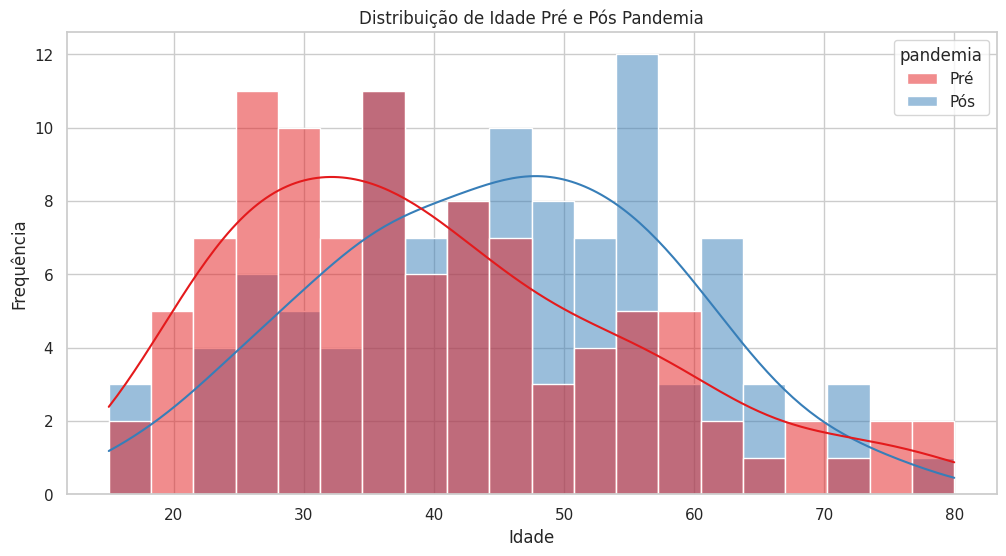

In [ ]:
#histograma de idade
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='idade', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribuição de Idade Pré e Pós Pandemia')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

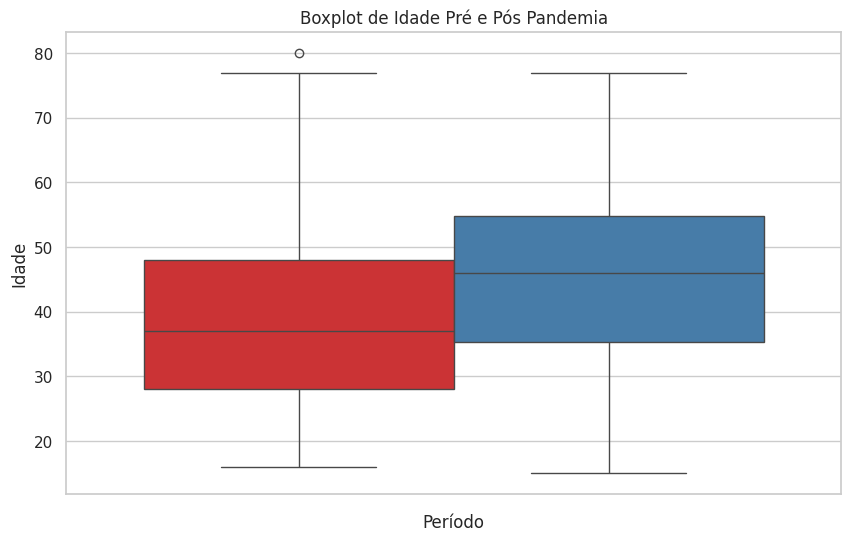

In [ ]:
#boxplot de idade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='idade', palette='Set1', legend=False)
plt.title('Boxplot de Idade Pré e Pós Pandemia')
plt.xlabel('Período')
plt.ylabel('Idade')
plt.show()

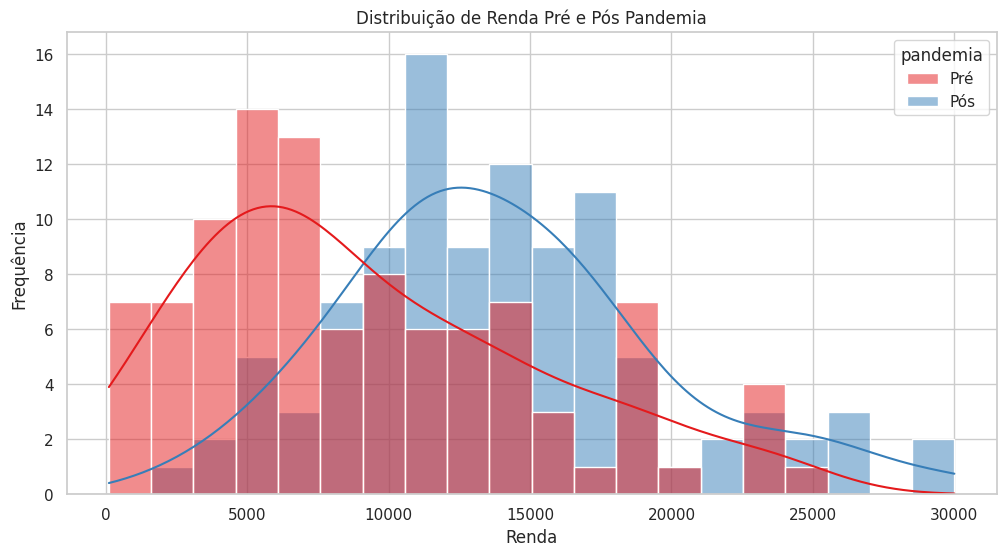

In [ ]:
#histograma de renda
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='renda', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribuição de Renda Pré e Pós Pandemia')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

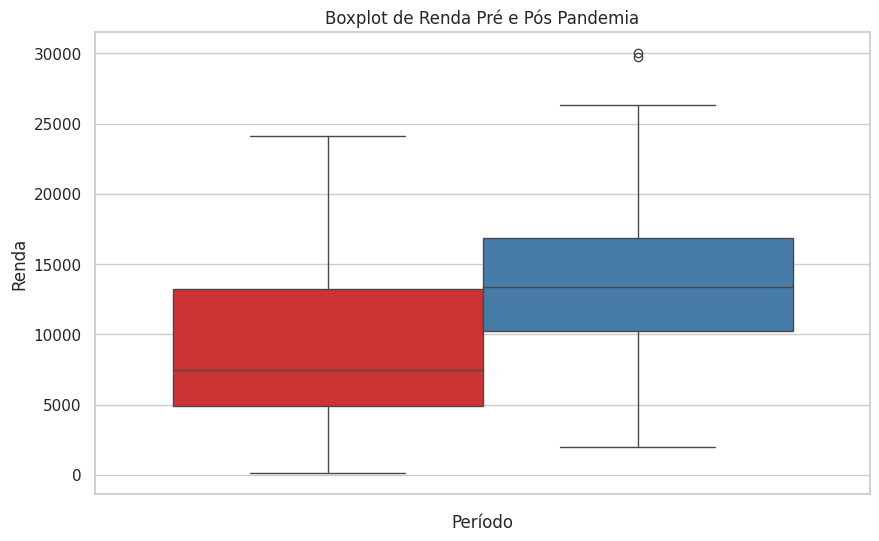

In [ ]:
#boxplot de renda
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='renda', palette='Set1', legend=False)
plt.title('Boxplot de Renda Pré e Pós Pandemia')
plt.xlabel('Período')
plt.ylabel('Renda')
plt.show()

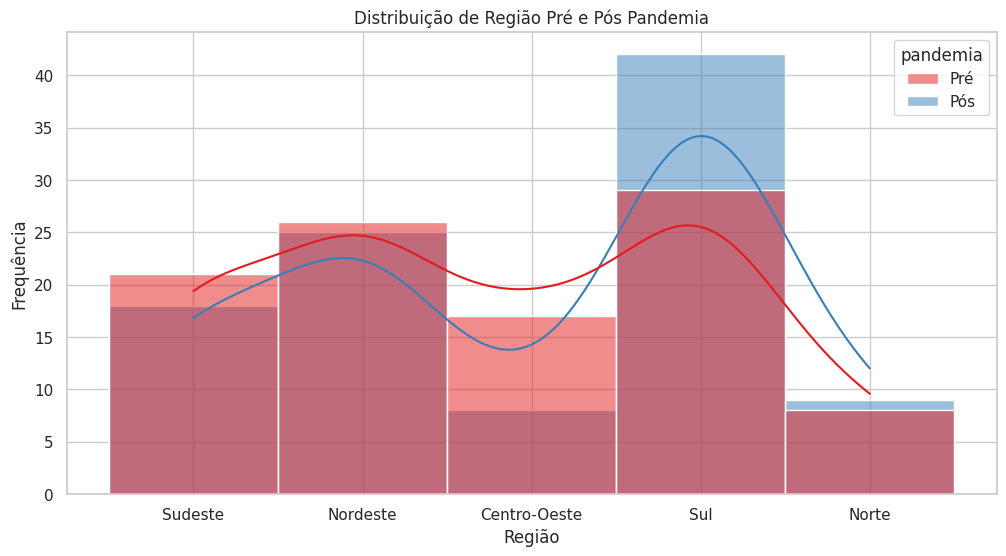

In [ ]:
#histograma de região
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='regiao-BR', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribuição de Região Pré e Pós Pandemia')
plt.xlabel('Região')
plt.ylabel('Frequência')
plt.show()

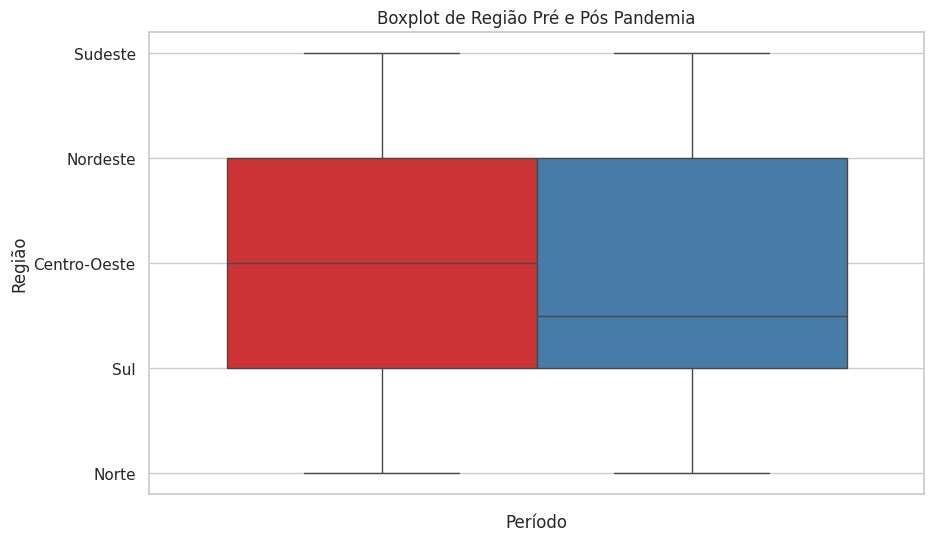

In [ ]:
#boxplot de região
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='regiao-BR', palette='Set1', legend=False)
plt.title('Boxplot de Região Pré e Pós Pandemia')
plt.xlabel('Período')
plt.ylabel('Região')
plt.show()

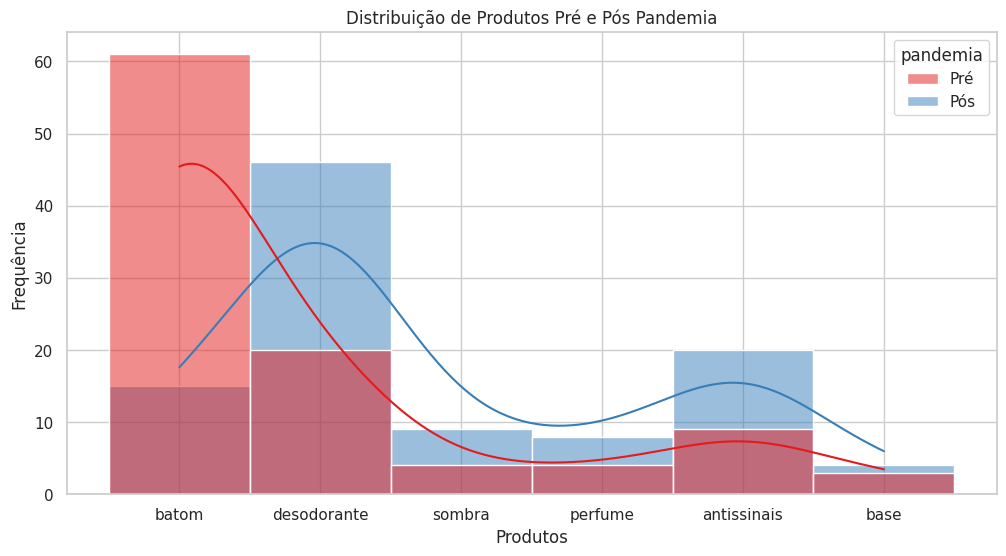

In [ ]:
#histograma de produto
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='produto', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribuição de Produtos Pré e Pós Pandemia')
plt.xlabel('Produtos')
plt.ylabel('Frequência')
plt.show()

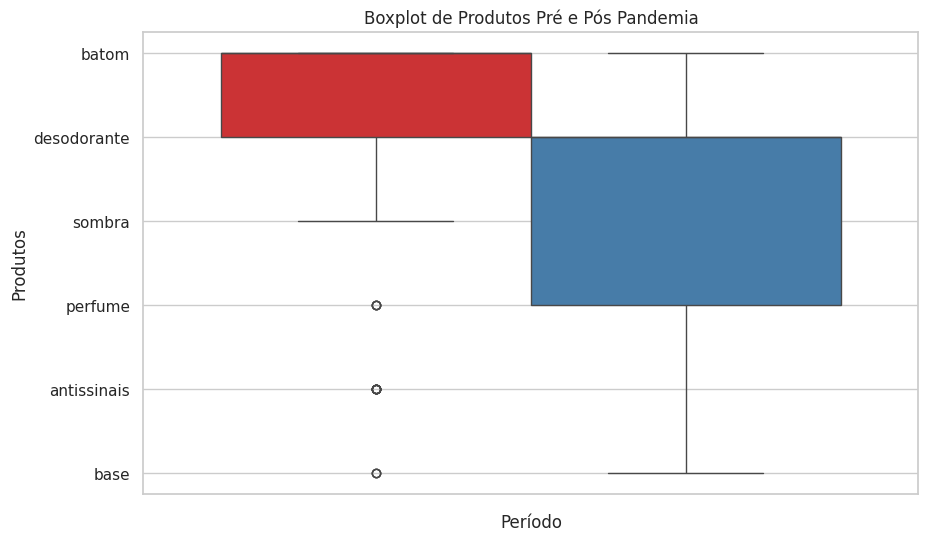

In [ ]:
#boxplot de produto
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='produto', palette='Set1', legend=False)
plt.title('Boxplot de Produtos Pré e Pós Pandemia')
plt.xlabel('Período')
plt.ylabel('Produtos')
plt.show()

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)


In [ ]:
# Produtos mais comprados pré e pós pandemia

labels = {1: 'Pré-Pandemia', 0: 'Pós-Pandemia'}

# pd.crosstab(): Cria uma tabela cruzada que mostra a contagem de cada
# produto em relação às categorias "Pré-Pandemia" e "Pós-Pandemia".
status_prod = pd.crosstab(
    df_consumidor['produto'],
    df_consumidor['pre-pandemia'],
    rownames = [ 'Produtos'],
    colnames = [ 'Categoria']
)

# status_prod.rename(): Renomeia as colunas usando o dicionário labels
# para substituir 1 por "Pré-Pandemia" e 0 por "Pós-Pandemia".
status_prod.rename(columns = labels, inplace = True)
status_prod

Categoria,Pós-Pandemia,Pré-Pandemia
Produtos,,
antissinais,20,9
base,4,3
batom,15,61
desodorante,46,20
perfume,8,4
sombra,9,4


In [ ]:
# Cálculo do percentual de crescimento dos produtos

# status_prod['Pós-Pandemia'] - status_prod['Pré-Pandemia']: Subtrai as contagens de produtos comprados "Pré-Pandemia" das
# contagens "Pós-Pandemia". Isso dá a diferença,  ou seja, o aumento ou diminuição do número de compras de cada produto após a pandemia.
# / status_prod['Pré-Pandemia']: Divide essa diferença pela contagem "Pré-Pandemia" para calcular a proporção do crescimento (ou redução).
# * 100: Multiplica o valor pela constante 100 para obter o percentual de crescimento.
# round(..., 2): Arredonda o valor final para duas casas decimais, para deixar o resultado mais legível.

porcentagem = round((status_prod['Pós-Pandemia'] - status_prod['Pré-Pandemia'])  / status_prod['Pré-Pandemia'] * 100, 2)
porcentagem

,0
Produtos,
antissinais,122.22
base,33.33
batom,-75.41
desodorante,130.00
perfume,100.00
sombra,125.00


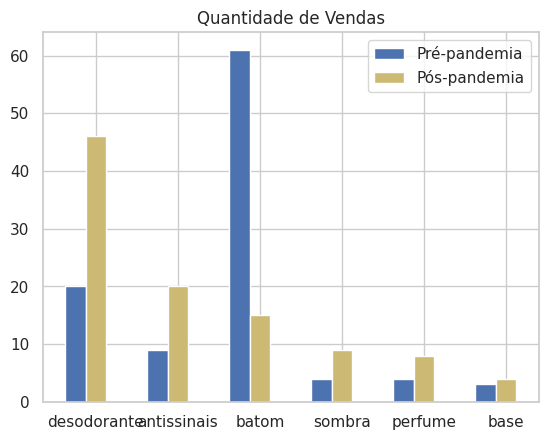

In [ ]:
# gráfico ilustrativo dos produtos

# Quantidade de vendas para o Produto A
valores_produto_pre = [20, 9, 61, 4, 4, 3]

# Quantidade de vendas para o Produto B
valores_produto_pos = [46, 20, 15, 9, 8, 4]

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_pre))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, valores_produto_pre, width=0.25, label = 'Pré-pandemia', color = 'b')
plt.bar(x2, valores_produto_pos, width=0.25, label = 'Pós-pandemia', color = 'y')

# Coloca o nome dos produtos como label do eixo x
meses = ['desodorante', 'antissinais', 'batom', 'sombra', 'perfume', 'base']
plt.xticks([x + 0.25 for x in range(len(valores_produto_pre))], meses)

# Inseri uma legenda no gráfico
plt.legend()

plt.title("Quantidade de Vendas")
plt.show()

3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
n_amostra = len(df_consumidor)
print(f"O tamanho da amostra é: {n_amostra}")

O tamanho da amostra é: 203


In [ ]:
import math
from scipy.stats import norm

def calcular_tamanho_amostra(populacao_total, nivel_confianca, margem_erro, proporcao_estimada=0.5):
    # Calcular o valor crítico Z para o nível de confiança
    Z = norm.ppf(1 - (1 - nivel_confianca) / 2)

    # Calcular o tamanho da amostra para população infinita
    n = (Z**2 * proporcao_estimada * (1 - proporcao_estimada)) / (margem_erro**2)

    # Ajustar para a população finita
    n_ajustado = n / (1 + (n / populacao_total))

    return math.ceil(n_ajustado)  # Arredondar para o próximo número inteiro

# Parâmetros
populacao_total = 100000
nivel_confianca = 0.95
proporcao_estimada = 0.5

# Margem de erro de 2%
margem_erro_2 = 0.02
tamanho_amostra_2 = calcular_tamanho_amostra(populacao_total, nivel_confianca, margem_erro_2, proporcao_estimada)
print(f"Tamanho da amostra necessário com 95% de confiança e 2% de margem de erro: {tamanho_amostra_2}")

# Margem de erro de 10%
margem_erro_10 = 0.10
tamanho_amostra_10 = calcular_tamanho_amostra(populacao_total, nivel_confianca, margem_erro_10, proporcao_estimada)
print(f"Tamanho da amostra necessário com 95% de confiança e 10% de margem de erro: {tamanho_amostra_10}")

# Verificar se a amostra atual é suficiente
amostra_atual = 203
print(f"Tamanho da amostra atual: {amostra_atual}")

if amostra_atual >= tamanho_amostra_2:
    print("A amostra atual é suficiente para uma margem de erro de 2% com 95% de confiança.")
else:
    print("A amostra atual NÃO é suficiente para uma margem de erro de 2% com 95% de confiança.")

if amostra_atual >= tamanho_amostra_10:
    print("A amostra atual é suficiente para uma margem de erro de 10% com 95% de confiança.")
else:
    print("A amostra atual NÃO é suficiente para uma margem de erro de 10% com 95% de confiança.")

Tamanho da amostra necessário com 95% de confiança e 2% de margem de erro: 2345
Tamanho da amostra necessário com 95% de confiança e 10% de margem de erro: 96
Tamanho da amostra atual: 203
A amostra atual NÃO é suficiente para uma margem de erro de 2% com 95% de confiança.
A amostra atual é suficiente para uma margem de erro de 10% com 95% de confiança.


## **Desafio 2: Determinando o Estoque de Segurança.**

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/desafio_02_estoque.csv"
df_estoque = pd.read_csv(url)
df_estoque.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [ ]:
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [ ]:
df_estoque['data'] = pd.to_datetime(df_estoque['data'])
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            370 non-null    datetime64[ns]
 1   vendas-iogurte  370 non-null    int64         
 2   lead-time       370 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.8 KB


**1**. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

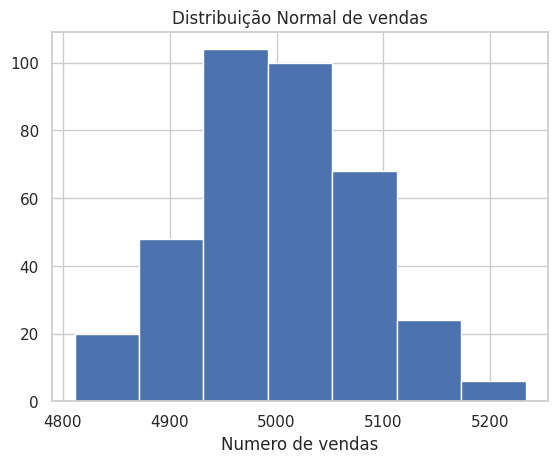

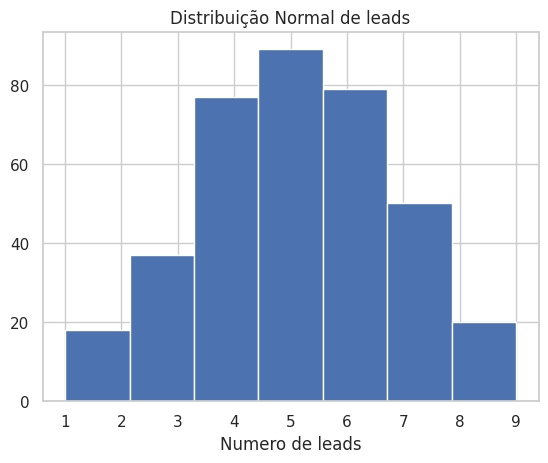

Pela geometria dos graficos é possivel concluir que o grafico de leads tem uma distribuição mais linear do que a de vendas mas as duas apresentaram distribuições normais.


In [ ]:
plt.hist(df_estoque['vendas-iogurte'], bins=7)
plt.title('Distribuição Normal de vendas')
plt.xlabel('Numero de vendas')
plt.grid(True)
plt.show()

plt.hist(df_estoque['lead-time'], bins=7)
plt.title('Distribuição Normal de leads')
plt.xlabel('Numero de leads')
plt.grid(True)
plt.show()

print('Pela geometria dos graficos é possivel concluir que o grafico de leads tem uma distribuição mais linear do que a de vendas mas as duas apresentaram distribuições normais.')

**2**. Assuma que:

*   a. Os dados seguem uma distribuição normal.
*   b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%
*   c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

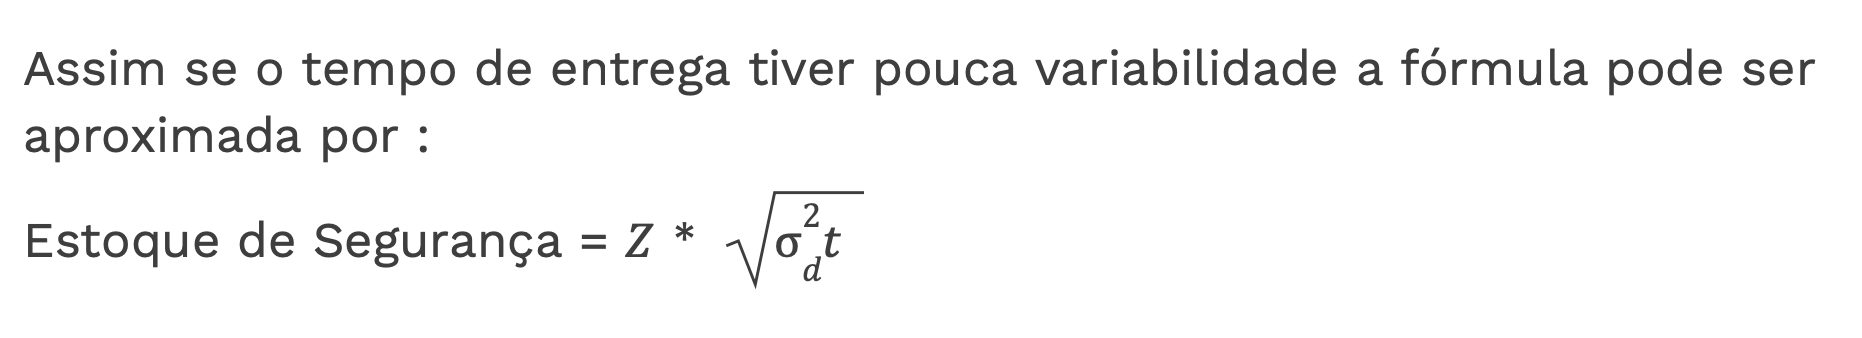

In [ ]:
# Z = o valor da tabela da distribuição normal, que indica a quantos desvios padrões ao redor da média temos que tomar para cobrir a proporção da área sob a curva normal /nível de serviço desejado.

# σ𝑑 = desvio padrão / variação da demanda

# t = lead time médio.

z_score = stats.norm.ppf(0.9987)

demand_std = df_estoque['vendas-iogurte'].std()
demand_mean = df_estoque['vendas-iogurte'].mean()

lead_time_std = df_estoque['lead-time'].std()
lead_time_mean = df_estoque['lead-time'].mean()

safety_stock = z_score * demand_std * np.sqrt(lead_time_mean)
print(f'O estoque de segurança desejado é de {math.ceil(safety_stock)}')

O estoque de segurança desejado é de 526


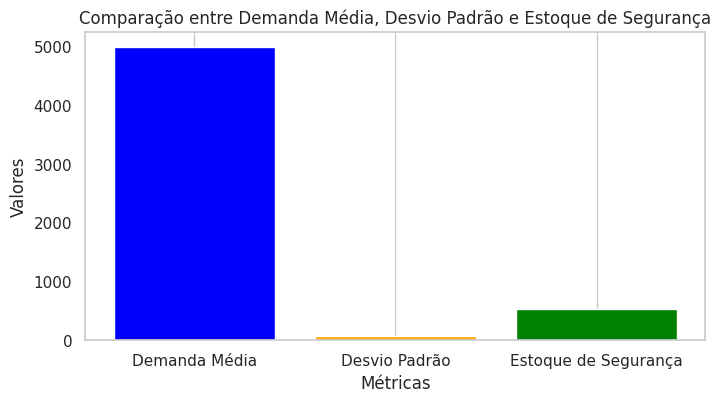

In [ ]:
# Preparar os dados para o gráfico
labels = ['Demanda Média', 'Desvio Padrão', 'Estoque de Segurança']
values = [demand_mean, demand_std, safety_stock]

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.title('Comparação entre Demanda Média, Desvio Padrão e Estoque de Segurança')
plt.ylabel('Valores')
plt.xlabel('Métricas')
plt.grid(axis='y')

# Mostrar o gráfico
plt.show()